# **ФБ-31 Васалатій Антон, завдання 7** 
___
## **A/Б-Тестування:**
**Нехай у нас є веб-застосунок з банером про збір коштів для Збройний Сил України. Зараз на ньому знаходиться текст**  
**"Зроби свій внесок у перемогу" і є думка змінити його на "Доможи Захисникам"**

### **Формування гіпотези:**
**Скористаємося запропонованим на практичному занятті правилом:**   
  
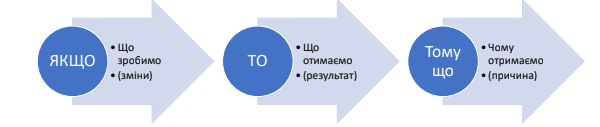

**Якщо ми змінимо текст на банері з "Зроби свій внесок у перемогу" на "Доможи Захисникам",**  
**то кількість благодійних внесків зросте,**  
**адже цей текст нагадуватиме людям про те, що їх мирне життя в тилу можливе лише завдяки тому,**  
**що хтось жертвує своїм життям і здоров'ям, стримуючи ворога, і тим самим викликатиме почуття обов'язку зокрема.**  
  
**Це є нашою альтернативною гіпотезою H1 - що в межах тестування буде зафіксовано зростання кількості внесків до величини,**  
**що задовольнятиме наш критерій успіху, який буде визначено нижче.**

**Нульова гіпотеза (H0) - прийняте за замовчуванням припущення про те, що серед середніх значень вибірок А і Б немає різниці.**  
**В нашому випадку практично це означатиме те, що зміна тексту банера не призведе до зростання кількості внесків**.

### **Визначення метрики:**
**Метрика AБ-тесту — показник, яким оцінюється, підтвердилася гіпотеза чи ні.**  
**В нашому випадку, як і в прикладі наведеному на практичному занятті,**  
**доцільно буде скористатися конверсією в цільові дії, а саме здійснення благодійного внеску.**

### **Визначення критерію успіху:**
**Конверсія благодійних внесків на нашому ресурсі становить 7%.**  
**Критерієм успіху встановимо значення 7.8%.**  

### **Підготовка експерименту:**
**Група А буде контрольною групою, що буде бачити початковий варіант банеру,**  
**Б - експериментальною, що бачитиме банер з текстом "Доможи Захисникам".**  
**Як граничне значення рівня значущості за якого нульова гіпотеза буде відкидатися оберемо поширений варіант - 0.05.**  
**Мінімальний розбір вибірки встановимо у 15000 унікальних користувачів**


### **Проведення експерименту:**


**Під час написання коду було використано наступні ресурси:**  
**https://www.kdnuggets.com/a-complete-guide-to-a-b-testing-in-python**  
**https://www.geeksforgeeks.org/data-science/a-b-testing-using-python/**  

**Імпортуємо необхідні залежності**

In [420]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from colorama import Fore, Style
import tabulate

**Стилізація виводу**

In [421]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [422]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

**Функція для обробки результатів тестування**

In [423]:
def analyze_ab_test_results(control_visitors, control_conversions,
                          treatment_visitors, treatment_conversions,
                          significance_level=0.05):

   control_rate = control_conversions / control_visitors
   treatment_rate = treatment_conversions / treatment_visitors
  
   absolute_diff = treatment_rate - control_rate
   relative_diff = absolute_diff / control_rate
  
   control_se = np.sqrt(control_rate * (1 - control_rate) / control_visitors)
   treatment_se = np.sqrt(treatment_rate * (1 - treatment_rate) / treatment_visitors)
  
   pooled_se = np.sqrt(control_se**2 + treatment_se**2)
   z_score = absolute_diff / pooled_se
  
   p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
  
   is_significant = p_value < significance_level
  
   return {
        'control_rate': control_rate,
        'treatment_rate': treatment_rate,
        'absolute_diff': absolute_diff,
        'relative_diff': relative_diff * 100,
        'z_score': z_score,
        'p_value': p_value,
        'is_significant': is_significant
   }

**Візуалізація**

In [424]:
def plot_ab_conversion(control_visitors, control_conversions,
                       treatment_visitors, treatment_conversions):

    data = pd.DataFrame({
        "group": ["Control (A)", "Treatment (B)"],
        "conversion_rate": [
            (control_conversions / control_visitors)*100,
            (treatment_conversions / treatment_visitors)*100
        ]
    })

    mean_rate = data["conversion_rate"].mean()

    colors = ["#4A90E2", "#50E3C2"]

    plt.figure(figsize=(8, 7))
    ax = sns.barplot(x="group", y="conversion_rate", data=data, palette=colors, hue="group", legend=False)
    plt.axhline(mean_rate, color="blue", linestyle="--", linewidth=2, label=f"Mean: {mean_rate:.3f}")

    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f"{height:.3f}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

    plt.grid(linestyle="--", alpha=0.4)
    plt.title("Conversion Rate (%) by Group", fontsize=14, fontweight="bold")
    plt.ylabel("Conversion Rate(%)",fontweight="bold")
    plt.xlabel("Group",fontweight="bold")
    plt.legend()
    plt.tight_layout()


**Генерація вибірок і обробка результатів**

In [425]:
def gen_sample_random(min_size, max_size, conv_rate):
    visitors = np.random.randint(min_size, max_size)
    conversions = np.random.binomial(visitors, conv_rate)
    return visitors, conversions

In [426]:
n = 15000
min_samp = n//2
max_samp = min_samp + 2000

In [427]:
def make_experiment(min_samp_size, max_samp_size, conv_rate_A, conv_rate_B, target_conv_rate_B):
    A = gen_sample_random(min_samp_size, max_samp_size, conv_rate_A)
    B = gen_sample_random(min_samp_size, max_samp_size, conv_rate_B)
    print_df(pd.DataFrame([{
        'control_visitors': A[0],'control_conversions': A[1],
        'treatment_visitors':  B[0],'treatment_conversions':  B[1]
    }]))
    res = analyze_ab_test_results(A[0], A[1], B[0], B[1])
    print_df(pd.DataFrame([res]))
    print_green_cyan_colored_pair(
        "Result of experiment:",
        "H1 successfully confirmed" if res['is_significant'] and res['treatment_rate'] >= target_conv_rate_B 
        else "Result is not significant" if not res['is_significant'] 
        else "H1 rejected"
    )  
    plot_ab_conversion(A[0], A[1], B[0], B[1])

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   control_visitors ┃   control_conversions ┃   treatment_visitors ┃   treatment_conversions ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃               7887 ┃                   556 ┃                 8389 ┃                     594 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃   control_rate ┃   treatment_rate ┃   absolute_diff ┃   relative_diff ┃   z_score ┃   p_value ┃ is_significant   ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃      0.0704958 ┃         0.070807 ┃     0.000311257 ┃        0.441525 ┃ 0.0774497 ┃  0.938266 ┃ False            ┃
┗━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━

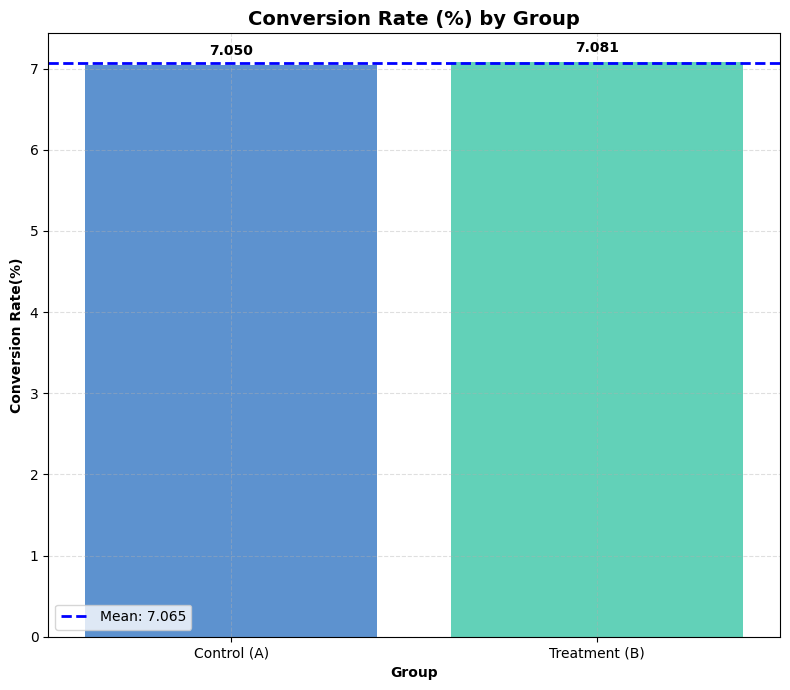

In [436]:
make_experiment(min_samp, max_samp, 0.07, 0.07, 0.078)

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   control_visitors ┃   control_conversions ┃   treatment_visitors ┃   treatment_conversions ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃               8366 ┃                   607 ┃                 7646 ┃                     624 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃   control_rate ┃   treatment_rate ┃   absolute_diff ┃   relative_diff ┃   z_score ┃   p_value ┃ is_significant   ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃      0.0725556 ┃        0.0816113 ┃      0.00905572 ┃         12.4811 ┃   2.14364 ┃ 0.0320618 ┃ True             ┃
┗━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━

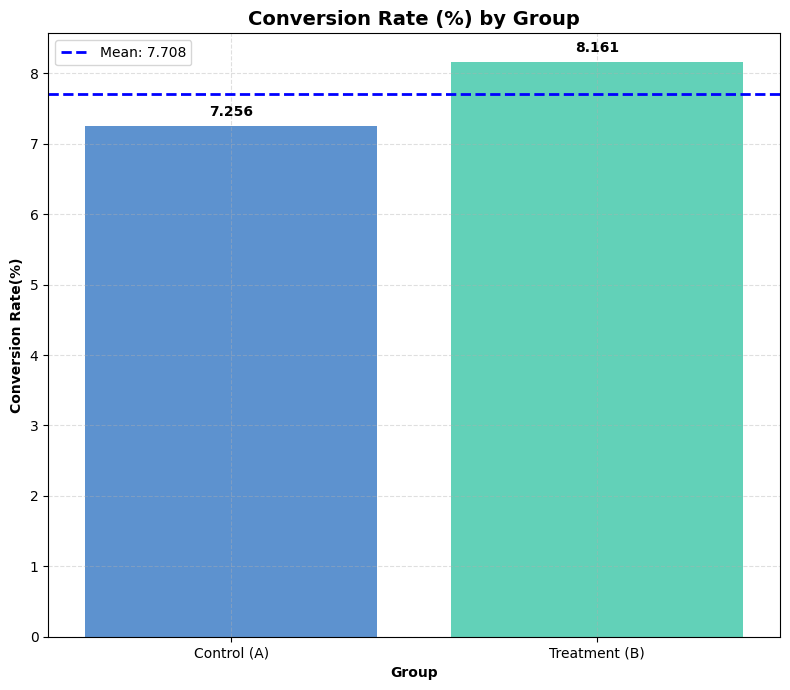

In [440]:
make_experiment(min_samp, max_samp, 0.07, 0.078, 0.078)

**В ході проведення двох експериментів отримали наступні результати:**  
  
**Показники в межах першого:**  
  
| control_visitors | control_conversions | treatment_visitors | treatment_conversions |
| ---------------- | ------------------- | ------------------ | --------------------- |
| 7887             | 556                 | 8389               | 594                   |  
  
================================================================================================================

| control_rate | treatment_rate | absolute_diff | relative_diff (%) | z_score | p_value | is_significant |
| ------------ | -------------- | ------------- | ----------------- | ------- | ------- | -------------- |
| 0.0705       | 0.0708         | 0.00031       | 0.44              | 0.0774  | 0.9383  | False          |       

**Показники в межах другого:**  
  
| control_visitors | control_conversions | treatment_visitors | treatment_conversions |
| ---------------- | ------------------- | ------------------ | --------------------- |
| 8366             | 607                 | 7646               | 624                   |   
      
================================================================================================================

| control_rate | treatment_rate | absolute_diff | relative_diff (%) | z_score | p_value | is_significant |
| ------------ | -------------- | ------------- | ----------------- | ------- | ------- | -------------- |
| 0.07256      | 0.08161        | 0.00906       | 12.48             | 2.144   | 0.03206 | True           |     

**За результати першого тестування отримали показники, що перевищили граничне значення значущості за якого гіпотеза H0 може бути відкинута.**  
**При повторному проведенні експерименту (з іншими параметрами) отримали підтврердження альтернативної гіпотези H1,**  
**адже значення значущості в межах допустимого діапазону і метрика (конверсія пожертв) відповідає критерію успіху (7.8%),**  
**а отже, згідно цих результатів, зміна тексту в банері на новий справді може призвести до зростання кількості благодійних внесків**   